In [8]:
import numpy as np
import PIL.Image
import tensorflow as tf
import cv2

In [9]:
from tensorflow import keras
model = keras.models.load_model('road Detection')

In [10]:
def predict(image_path, model):
  src = cv2.imread(image_path)
  src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  cv2.GaussianBlur(src_gray,[5,5], 5, src_gray, 5)
  cv2.fastNlMeansDenoising(src_gray,src_gray,75,7,21)
  cv2.fastNlMeansDenoising(src_gray,src_gray,25,7,21)
  cv2.fastNlMeansDenoising(src_gray,src_gray,25,7,21)
  src_gray = cv2.blur(src_gray, (3,3))

  img = cv2.cvtColor(src_gray, cv2. COLOR_GRAY2RGB)
  image = PIL.Image.fromarray(img)
  input_arr = tf.keras.preprocessing.image.img_to_array(image)
  arr = []
  for i in range(80,180):
    temp = tf.where(input_arr > i, 0, 255)
    test_image = np.asarray(temp).astype(np.uint8)
    test_image = cv2.cvtColor(test_image,cv2.COLOR_RGB2GRAY)
    contours, hierarchy = cv2.findContours(test_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    clist = []
    for c in contours:
      clist.append(cv2.contourArea(c))
    
    clist = sorted(clist,reverse=True)
    if len(clist) > 1 and clist[1] > 5000 :
      arr.append(temp)        
  input_arr = np.array(arr) 
  predictions = model.predict(input_arr)
  sum = [0, 0]
  for arr_element in predictions:
    for i in range(2):
      sum[i] += arr_element[i]
  for i in range(2):
    sum[i] *= (100.0/len(predictions))
  print(sum)

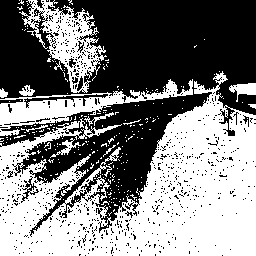

[0.21280936515805396, 99.78719039396806]


In [11]:
display(tf.keras.preprocessing.image.load_img("predict1.png"))
predict("predict1.png", model)

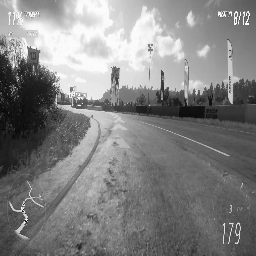

[99.99522800030915, 0.0047716576892012]


In [12]:
impath = 'predict2.png'

display(tf.keras.preprocessing.image.load_img(impath))
predict(impath, model)

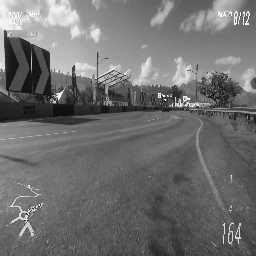

[79.75265454986821, 20.247345986654576]


In [13]:
impath = 'predict3.png'

display(tf.keras.preprocessing.image.load_img(impath))
predict(impath, model)

In [14]:
# def predict(image_path, model, threshhold= True):
#   image = tf.keras.preprocessing.image.load_img(image_path)
#   input_arr = tf.keras.preprocessing.image.img_to_array(image)
#   if(threshhold == True):
#     arr = []
#     for i in range(126,128):
#       temp = tf.where(input_arr > i, 1, 0)
#       arr.append(temp)
#     input_arr = np.array(arr) 
#   else:
#     input_arr = np.array([input_arr])
#   predictions = model.predict(input_arr)
#   sum = [0, 0]
#   for arr_element in predictions:
#     for i in range(2):
#       sum[i] += arr_element[i]
#   for i in range(2):
#     sum[i] *= (100/len(predictions))
#   print(sum)